### Carga de Librerías

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import modulos as mod
import preprocessors as pp
from sklearn.preprocessing import StandardScaler

C:\Users\Ferickcen\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Carga de Dataset

In [2]:
data = pd.read_csv('test.csv', sep = ",", encoding='latin-1')
dataset = data

In [3]:
#dataset = dataset.drop(['PassengerId'], axis=1)

In [4]:
dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Variables Numéricas

In [5]:
mod.getNumColNames(dataset)

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

#### Variables Categóricas

In [6]:
mod.getCatColNames(dataset)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

### Variables Numéricas con Faltantes

In [7]:
cols_num_con_nan = mod.getNumNanColNames(dataset)
cols_num_con_nan

['Age', 'Fare']

#### El datfsfsfsdf

### Imputación de Columnas Numéricas que contienen Nan

In [8]:
for col in cols_num_con_nan:
    pp.imputVNmedia(dataset, col)

### Columnas Categóricas con Nan menor a 5%

In [9]:
cols_cca = mod.getNanGoodColsNames(dataset, 0.05)
cols_cca

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

### Aplicación de CCA para columnas Categoricas con Nan 

In [10]:
dataset_temp = dataset[cols_cca].dropna()

In [11]:
dataset_temp.shape, dataset.shape

((418, 9), (418, 10))

In [12]:
dataset_vn = dataset_temp

### Determinación de columnas categoricas con NaN mayor a 5%

In [13]:
cols_cat_con_nan = mod.getCatNanColNames(dataset_vn)
cols_cat_con_nan

[]

#### No hay variables categoricas con nan

### Función Imputación de Variables Categóricas con Missings

In [14]:
for col in cols_cat_con_nan:
    pp.ImpVC(dataset_vn)

In [15]:
dataset_vc = dataset_vn
dataset_vc

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,S


### Codificación Variables Categóricas

In [16]:
cat_cols = mod.getCategoryVars(dataset_vc)
cat_cols

['Name', 'Sex', 'Ticket', 'Embarked']

#### Imputación por Frequency Encoding

In [17]:
for col in cat_cols:
    pp.executeFreqEncoding(dataset_vc, map_type='freq')

In [18]:
dataset_cvc = dataset_vc
dataset_cvc

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,1.0,266.0,0,0,1.0,7.8292,46.0
1,893,3,1.0,152.0,1,0,1.0,7.0000,270.0
2,894,2,1.0,266.0,0,0,1.0,9.6875,46.0
3,895,3,1.0,266.0,0,0,1.0,8.6625,270.0
4,896,3,1.0,152.0,1,1,1.0,12.2875,270.0
...,...,...,...,...,...,...,...,...,...
413,1305,3,1.0,266.0,0,0,1.0,8.0500,270.0
414,1306,1,1.0,152.0,0,0,1.0,108.9000,102.0
415,1307,3,1.0,266.0,0,0,1.0,7.2500,270.0
416,1308,3,1.0,266.0,0,0,1.0,8.0500,270.0


In [19]:
dataset_cvc.dtypes

PassengerId      int64
Pclass           int64
Name           float64
Sex            float64
SibSp            int64
Parch            int64
Ticket         float64
Fare           float64
Embarked       float64
dtype: object

### Transformación de Variables Numéricas

In [20]:
numeric_cont_vars = mod.getContinuesCols(dataset_cvc)
numeric_cont_vars

['PassengerId', 'Fare']

### Graficación de las variables para transformación

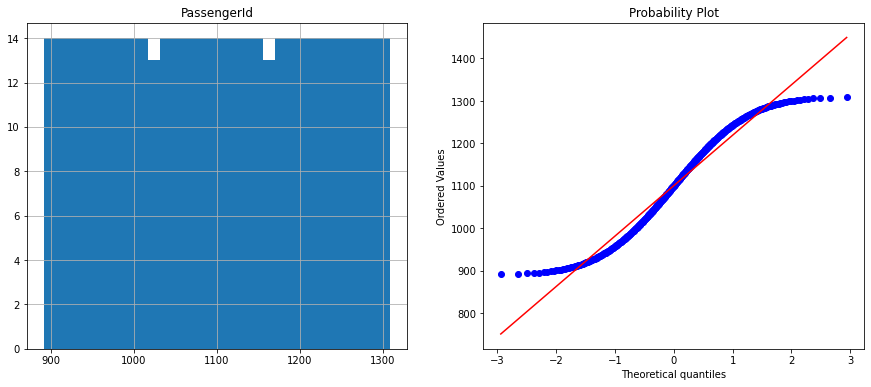

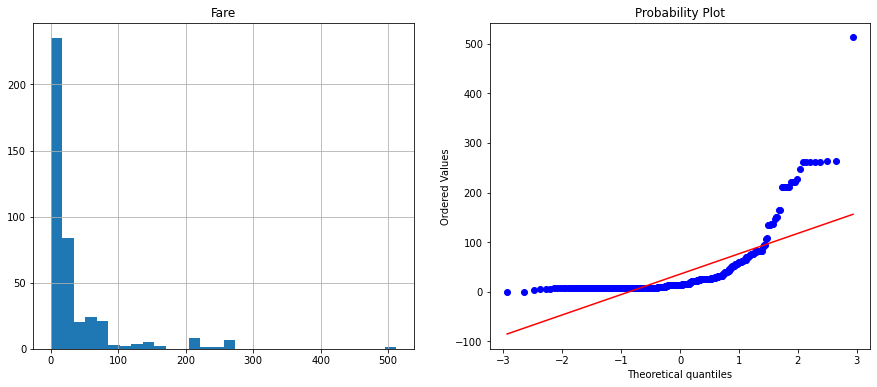

In [21]:
for col in numeric_cont_vars:
    mod.plot_density_variable(dataset_cvc, col)

### Función de Transformación de Variables

In [22]:
pp.transfvnumInv(dataset_cvc, "Fare")

In [23]:
dataset_tvn = dataset_cvc

In [24]:
dataset_tvn

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,1.0,266.0,0,0,1.0,7.8292,46.0
1,893,3,1.0,152.0,1,0,1.0,7.0000,270.0
2,894,2,1.0,266.0,0,0,1.0,9.6875,46.0
3,895,3,1.0,266.0,0,0,1.0,8.6625,270.0
4,896,3,1.0,152.0,1,1,1.0,12.2875,270.0
...,...,...,...,...,...,...,...,...,...
413,1305,3,1.0,266.0,0,0,1.0,8.0500,270.0
414,1306,1,1.0,152.0,0,0,1.0,108.9000,102.0
415,1307,3,1.0,266.0,0,0,1.0,7.2500,270.0
416,1308,3,1.0,266.0,0,0,1.0,8.0500,270.0


### Outliers

In [25]:
numeric_cont_vars

['PassengerId', 'Fare']

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


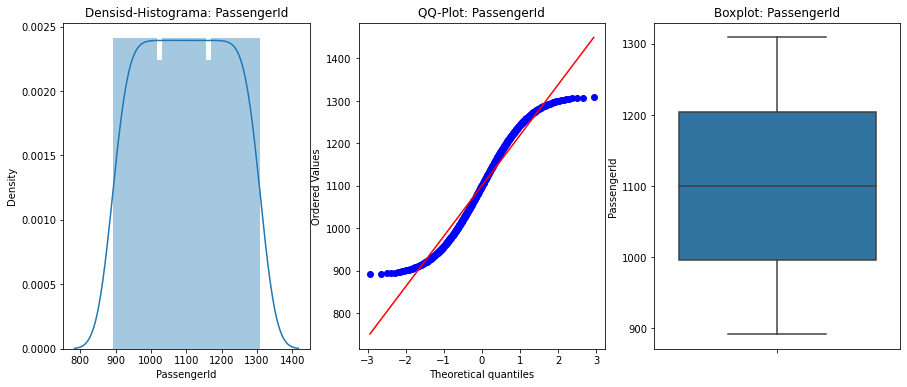

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


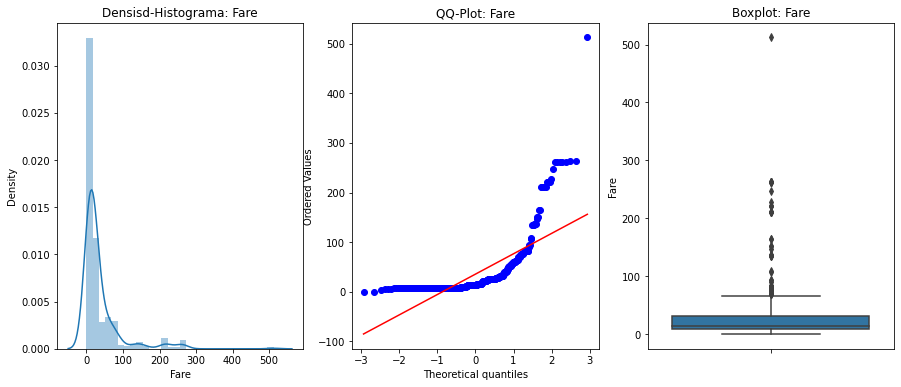

In [26]:
for col in numeric_cont_vars:
    mod.inspect_outliers(dataset_tvn, col)

In [27]:
for col in numeric_cont_vars:
    mod.detect_outliers(dataset_tvn, col, 1.75)

In [28]:
for col in numeric_cont_vars:
    pp.outlier_treatment(dataset_tvn, col, 1.75)

In [29]:
dataset_sca = dataset_tvn

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


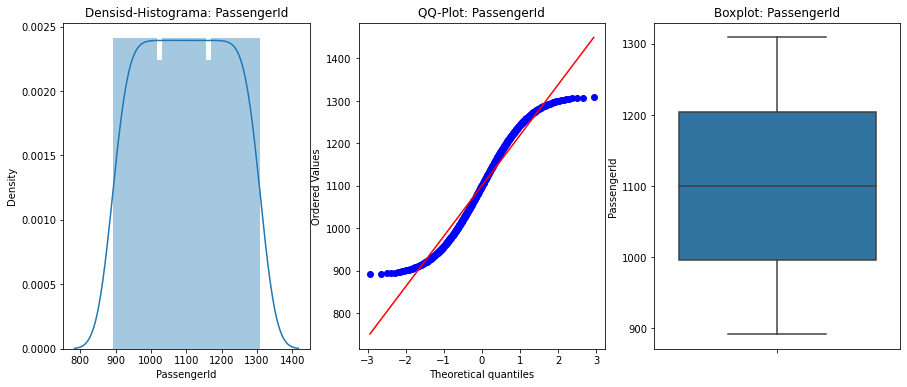

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


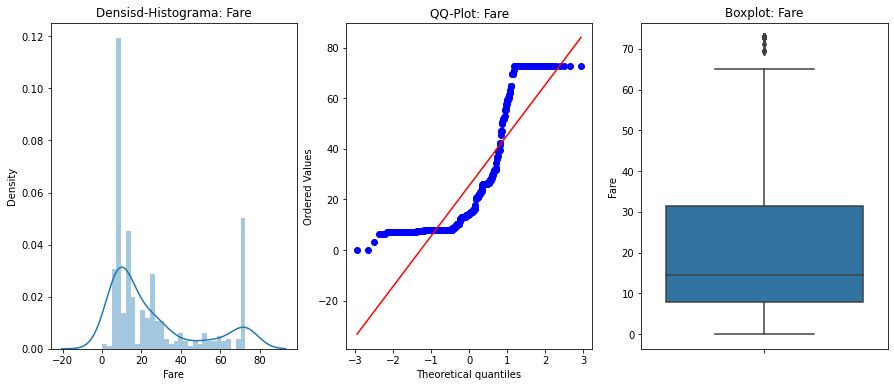

In [30]:
for col in numeric_cont_vars:
    mod.inspect_outliers(dataset_sca, col)

### Featuring Scaling

In [31]:
dataset_sca[dataset_sca.columns[1:10]]

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,3,1.0,266.0,0,0,1.0,7.82920,46.0
1,3,1.0,152.0,1,0,1.0,7.00000,270.0
2,2,1.0,266.0,0,0,1.0,9.68750,46.0
3,3,1.0,266.0,0,0,1.0,8.66250,270.0
4,3,1.0,152.0,1,1,1.0,12.28750,270.0
...,...,...,...,...,...,...,...,...
413,3,1.0,266.0,0,0,1.0,8.05000,270.0
414,1,1.0,152.0,0,0,1.0,72.80735,102.0
415,3,1.0,266.0,0,0,1.0,7.25000,270.0
416,3,1.0,266.0,0,0,1.0,8.05000,270.0


In [32]:
#scaler = StandardScaler()
#scaler.fit(dataset_sca) 

In [33]:
#dataset_final = pd.DataFrame(scaler.transform(dataset_sca), columns=dataset_sca.columns)
dataset_final = dataset_sca

In [34]:
#np.round(dataset_final.describe(), 2)

### Data Set Final

In [35]:
dataset_final = dataset_final.drop(['Name','Ticket'], axis=1)
dataset_final['PassengerId'] = dataset_vn['PassengerId'].values

In [36]:
#dataset_final = dataset_final.drop(['Name'], axis=1)
#dataset_final.loc[dataset_final.Tipo_Contrato == 1020, "Survived"] = 1
#dataset_final.loc[dataset_final.Tipo_Contrato == 1091, "Survived"] = 0

In [37]:
dataset_final

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,892.0,3,266.0,0,0,7.82920,46.0
1,893.0,3,152.0,1,0,7.00000,270.0
2,894.0,2,266.0,0,0,9.68750,46.0
3,895.0,3,266.0,0,0,8.66250,270.0
4,896.0,3,152.0,1,1,12.28750,270.0
...,...,...,...,...,...,...,...
413,1305.0,3,266.0,0,0,8.05000,270.0
414,1306.0,1,152.0,0,0,72.80735,102.0
415,1307.0,3,266.0,0,0,7.25000,270.0
416,1308.0,3,266.0,0,0,8.05000,270.0


### Conversión del dataframe a csv

In [38]:
dataset_final.to_csv("DataTratadaTest.csv", encoding = 'latin-1')

### Correlación de las Variables

In [39]:
#dataset_final.corr().to_csv("correlaciones.csv", encoding = 'latin-1')